# TPM Complex Example

As of right now, TPMComplex only works for S11 on short models, however the translation to other models should be pretty easy - define new equations, parameters, and bounds.

In [2]:
import sys
sys.path.append(r"C:\ProgramData\Anaconda2\Lib\site-packages\pyMeasure\Documentation\SaraProject\NIST")
from TPMComplex import *

In [3]:
# Create a model
freq = np.linspace(20E9, 50E9, 500)
short = ShortModel(frequency=freq, complex=True)

# Define true parameters/values
true_params = short.make_params(z0=short.z0, l0_real=short.l0, l0_imag=short.l0, l1_real=short.l1,
                                l1_imag=short.l1, l2_real=short.l2, l2_imag=short.l2, f=short.f[0])
true_s11 = short.eval(params=true_params, f=freq)

# Define measured data
noise_scale = 1E-11
measured_s11 = true_s11 + noise_scale*(np.random.randn(len(freq)) + 1j*np.random.randn(len(freq)))

Default parameter input l0=l1=l2=1e-12


In [4]:
# Use guess() to establish an initial guess for params.
guess = short.guess(measured_s11, f=freq, verbose=True)

('fmin=', 20000000000.0, 'fmax=', 50000000000.0, 'f0_guess=', 47535070140.280563)
('z0_min=', 1.6666666666666667, 'z0_max=', 831.66666666673439, 'z0_guess=', 37.230513172815975)
('l0_imag_guess=', 3.1251944792154749e-12, 'l1_imag_guess=', 6.574502719766112e-23, 'l2_imag_guess=', 1.3830846783993635e-33)


In [15]:
# Fit to find real parameters
# I used 'cg' (conjugate gradient) because I've found it works the best
# I have reread and apparently I use 'cd' which shouldn't exist but it works? 
# I have no idea why/what is happening. It isn't defaulting to leastsq.
# other options - https://lmfit.github.io/lmfit-py/fitting.html?highlight=leastsq#lmfit.minimizer.Minimizer.leastsq
result = short.fit(measured_s11, params=guess, f=freq, method='cd')
print result.fit_report()

[[Model]]
    Model(short_equation)
[[Fit Statistics]]
    # function evals   = 2506
    # data points      = 1000
    # variables        = 7
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -47296.618
    Bayesian info crit = -47262.263
[[Variables]]
    z0:        5.00946394 (init= 37.23051)
    l0_real:  -6.8871e-11 (init= 3.125194e-12)
    l0_imag:   1.7244e-11 (init= 3.125194e-12)
    l1_real:   5.4376e-22 (init= 6.574503e-23)
    l1_imag:   2.9640e-21 (init= 6.574503e-23)
    l2_real:   1.0578e-31 (init= 1.383085e-33)
    l2_imag:   1.3974e-32 (init= 1.383085e-33)



In [16]:
# Gauge how accurate the fit was compared to true values
print(test_complex_fit(true_s11, result))

['real error: ', 5.3251796527931107e-11, 'imag error: ', 3.1412072831548002e-10]


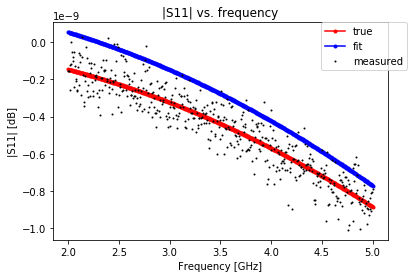

In [17]:
# Evaluate eqn. using fitted params and compare
fit_s11 = short.eval(params=result.params, f=freq)
plot_complex(freq, fit_s11, true_s11, measured_s11)

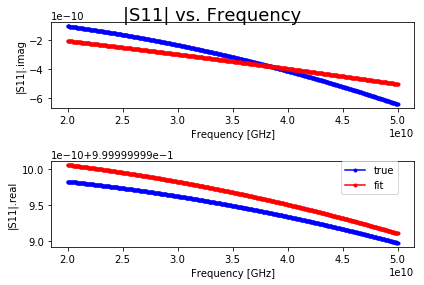

In [18]:
# Plot R/I
plot_ri(freq, fit_s11, true_s11)